# Data Augmentation with PyTorch

This notebook will show how the images in a dataset can be processed using both geometric and colour operations.


### Refs

PyTorch Transforms: https://pytorch.org/vision/stable/transforms.html

Pytorch Illustration of Transforms: https://pytorch.org/vision/stable/auto_examples/transforms/plot_transforms_illustrations.html



In [35]:
import torch
import torchvision
from torchvision.transforms import v2

import matplotlib.pyplot as plt
import numpy as np
import time

# importing a module with utilities for displaying stats and data
import sys
sys.path.insert(1, '../../util')
import vcpi_util

In [36]:
data_dir = 'dogsVScats'
img_size = 128

BATCH_SIZE = 8

In [37]:
from PIL import Image

In [38]:
img1 = Image.open(f'{data_dir}/cats/cat.3.jpg')
img2 = Image.open(f'{data_dir}/cats/cat.4.jpg')

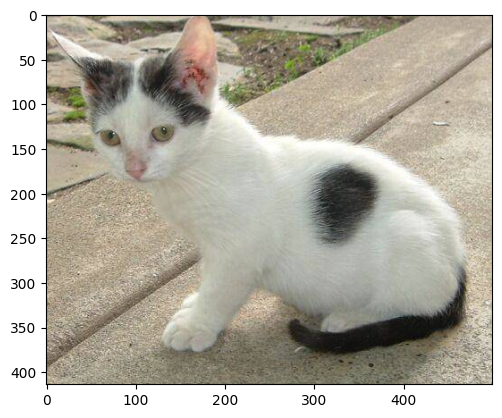

In [39]:
plt.imshow(img1)


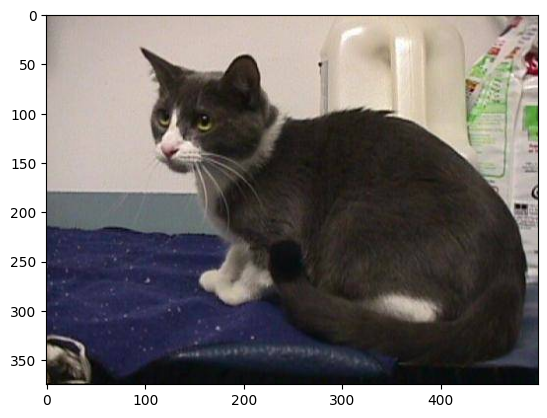

In [40]:
plt.imshow(img2)

In [41]:
transform = v2.Compose([v2.ToImage(),
                        v2.Resize((img_size + 20, img_size + 20)),
                        v2.RandomCrop((img_size, img_size)),
                        v2.ToDtype(torch.float32, scale=True)])

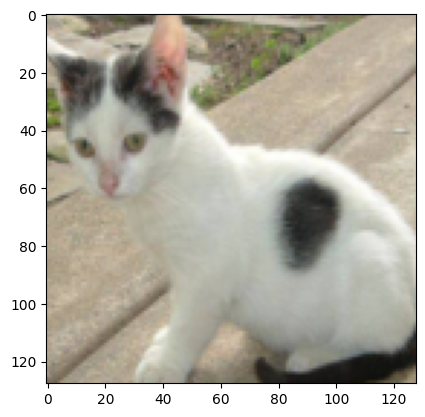

In [42]:
transf_img1 = transform(img1)

plt.imshow(np.transpose(transf_img1.numpy(), (1, 2, 0)))

In [43]:
train_set = torchvision.datasets.ImageFolder(data_dir, transform=transform)

train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

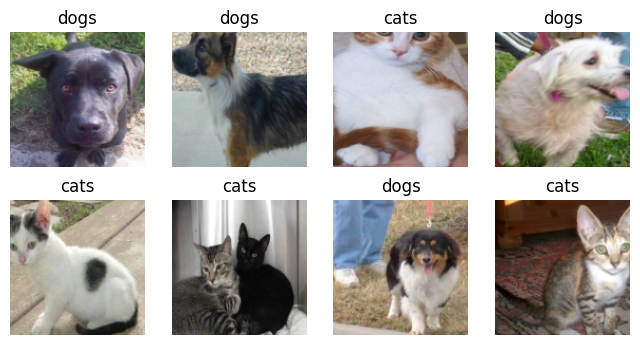

<Figure size 640x480 with 0 Axes>

In [44]:
imgs, labels = next(iter(train_loader))
vcpi_util.show_images(2, 4, imgs, labels, train_set.classes)

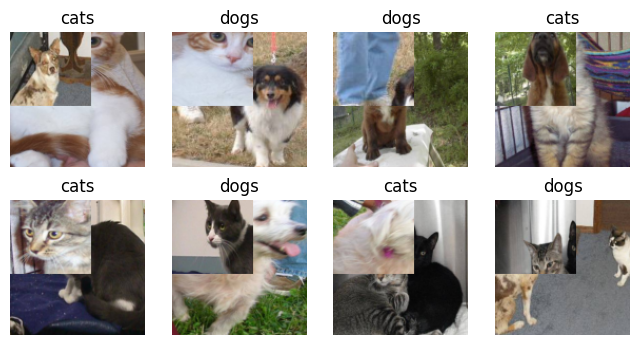

<Figure size 640x480 with 0 Axes>

In [45]:
transform2 = v2.Compose([v2.Resize((img_size, img_size)),
                        v2.ToImage(),
                        v2.ToDtype(torch.float32, scale=True)])

train_set = torchvision.datasets.ImageFolder(data_dir, transform=transform)
train_loader = torch.utils.data.DataLoader(train_set, batch_size=BATCH_SIZE, shuffle=True)

cutmix = v2.CutMix(num_classes=2)
mixup = v2.MixUp(num_classes=2)
cutmix_or_mixup = v2.RandomChoice([cutmix, mixup], [0.5,0.5])

imgs, labels = next(iter(train_loader))
imgs2, labels2 = cutmix_or_mixup(imgs, labels)
vcpi_util.show_images(2, 4, imgs2, labels, train_set.classes)

In [46]:
print(labels2)

tensor([[0.6710, 0.3290],
        [0.3290, 0.6710],
        [0.0000, 1.0000],
        [0.6710, 0.3290],
        [1.0000, 0.0000],
        [0.3290, 0.6710],
        [0.6710, 0.3290],
        [0.3290, 0.6710]])


In [48]:
train_loader = torch.utils.data.DataLoader(
    torch.utils.data.ConcatDataset([
        torchvision.datasets.ImageFolder(data_dir, transform=transform),
        torchvision.datasets.ImageFolder(data_dir, transform=transform2)
    ]), batch_size=16, shuffle=True
)

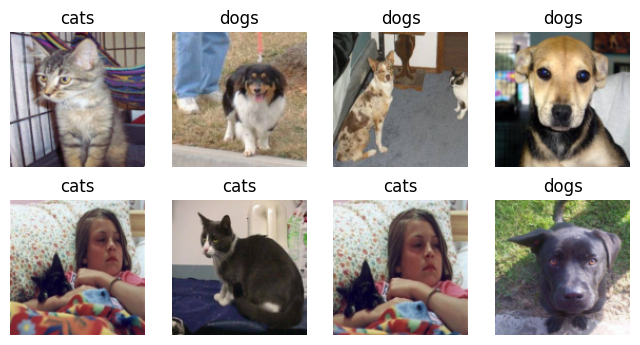

<Figure size 640x480 with 0 Axes>

In [49]:
imgs, labels = next(iter(train_loader))
vcpi_util.show_images(2, 4, imgs, labels, train_set.classes)